# Úkoly 
1. vykreslete grafy prvních 5 Legendrových polynomů na intervalu [-1,1]

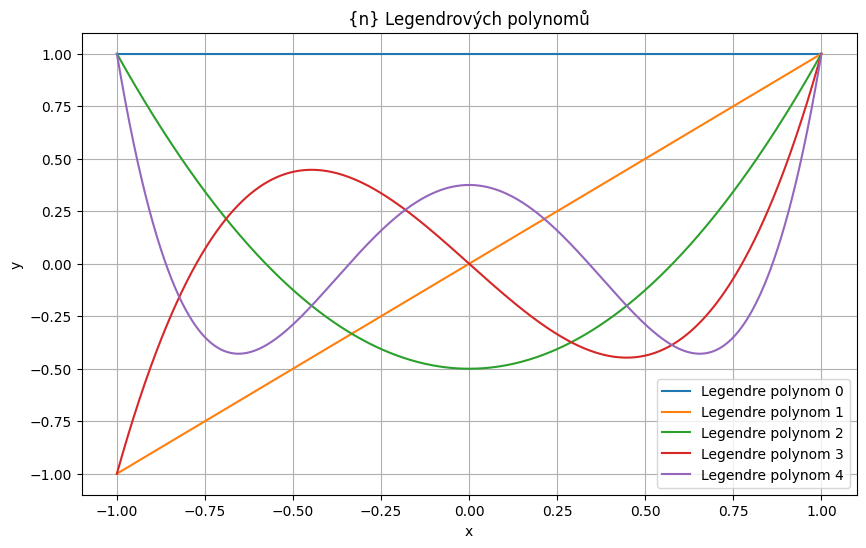

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

n = 5 
x = np.linspace(-1, 1, 1000)  # rozsah hodnot x 
legendre_polynomy = [legendre(i) for i in range(n)]
plt.figure(figsize=(10, 6))
for i in range(n):
    plt.plot(x, legendre_polynomy[i](x), label=f'Legendre polynom {i}')
plt.title('Legendrovy polynomy')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


2. Vyrobte sparse matici o rozměrech $n^2\times n^2$. Tato matice reprezentuje pravidelnou čtvercovou síť o velikosti $n \times n$. Každá buňka této čtvercové sítě odpovídá jednomu řádku/sloupci matice, přičemž pořadí buněk čtvrtcové sítě berte po řádcích (viz obrázek níže). Hodnoty v matici budou řízeny jedním parametrem $\varepsilon$, pro jednoduchost si místo něj představte $0.1$.
Nenulové hodnoty v matici jsou zadány sousedností buněk a to následovně:
    - hodnoty na diagonále (tedy sousednost prvku se sebou samým) jsou $1 + k \cdot \varepsilon$ (kde $k$ určuje počet sousedních buněk = 4 uvnitř, 3 na hranách, 2 v rozích)
    - mimodiagonální prvky mají hodnotu $-\varepsilon$, právě tehdy pokud index řádku a index sloupce mimodiagonálního prvku odpovídá sousedním buňkám ve čtvercové síti viz obrázek.

Ukázka jak přechází mřížka do matice pro $n=4$ a $\varepsilon = 0.1$ na následujícím obrázku:
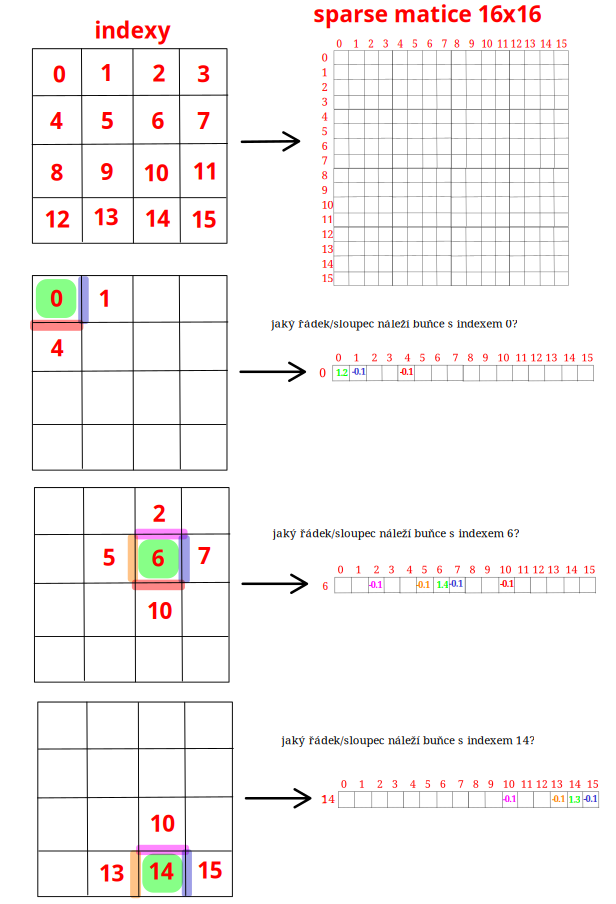


Sestavte matici pomocí formátu LIL a vyplňte hodnoty pomocí cyklu přes všechny buňky čtvercové sítě. Vznikne manice s následujícími vlastnostmi:
- velikost $n^2 \times n^2$
- $\varepsilon$ je parametr, který můžete nastavit, například $\varepsilon = 0.1$
- matice je symetrická, tj. $A = A^T$
- každý řádek/sloupec má maximálně 5 nenulových prvků
    - 5, pokud se jedná o buňku unvitř sítě
    - 4, pokud se jedná o buňku na okraji sítě
    - 3, pokud se jedná o buňku v rohu sítě
- výsledná matice je 5-ti diagonální (hlavní diagonála, dvě vedleší těsně pod a nad hlavní diagonálou, dvě vedleší diagonály ve vzdálenosti $\pm n$ od hlavní diagonály)

Pro $n=3$ a $\varepsilon = 0.1$ by měla matice (v plné formě) měla vypadat následovně:
```python
[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]
 ```


In [40]:
import scipy.sparse as sparse
n = 3
epsilon = 1e-1
A = sparse.lil_matrix((n*n, n*n))

for i in range(n):
    for j in range(n):
        index= i*n +j
        sousedi = []
        if i > 0:
            sousedi.append((i - 1, j))
        if i < n - 1:
            sousedi.append((i + 1, j))
        if j > 0:
            sousedi.append((i, j - 1))
        if j < n - 1:
            sousedi.append((i, j + 1))
        A[index, index] = 1 + len(sousedi) * epsilon
            
        for s in sousedi:
            s_index = s[0] * n + s[1]
            A[index, s_index] = -epsilon
        
print(A.todense())

[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]


3. sestavte matici $A$ z předchozího úkolu bez použití cyklů. Sestavte nejprve vektory indexů řádků, sloupců a hodnot pro všechny nenulové prvky matice. Poté sestavte sparse matici ve formátu CSR najednou z těchto tří polí. Hint, jak na to: 
    - Sestavte tři pole: `row`, `col` a `data`, které obsahují řádky, sloupce a hodnoty nenulových prvků matice 
        - separátně sestavte příspěvky které vzniknou konektivitou na vnitřních horizontálních hranách a na vnitřních vertikálních hranách.
            - při procházení všech vnitřních horizontálních hran si rozmyslete jaké jsou vždy indexy nad a pod hranou (toto jsou souřadnice řádků a sloupců nenulových prvků)
            - totéž pro vnitřní vertikální hrany zde se může hodit `np.arange(n * n).reshape((n, n)).T.flatten()` což vytvoří vektor s přeházenými indexy (tedy indexy buněk uspořádané po sloupcích)
        - zvlášť sestavte příspevky pro mimodiagonální prvky a diagonální prvky.
            - u diagonálních prvků, nejprve vyrobte vektor hodnot $1+ 4\cdot \varepsilon$ a pak pro každou hranu odečtěte $\varepsilon$.
    - Tyto pole vytvořte vektorizovaně - bez cyklů

In [39]:
import numpy as np
from scipy.sparse import csr_matrix

n = 3
epsilon = 0.1

def A_efficiently(n, epsilon):
    ## --- Mimodiagonální prvky
    # Vnitřní horizontální hrany
    horizontal_up_idx = np.arange(n*n - n)
    horizontal_low_idx = np.arange(n, n*n)
    row_horizontal = np.hstack((horizontal_up_idx, horizontal_low_idx))
    col_horizontal = np.hstack((horizontal_low_idx, horizontal_up_idx))
    data_horizontal = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná

    # Vnitřní vertikální hrany
    index_matrix_vertical = np.arange(n * n).reshape((n, n)).T.flatten() # prehazene pro vertikalni hramu
    vertical_left_idx = index_matrix_vertical[:-n].reshape(n-1, n).flatten()
    vertical_right_idx = index_matrix_vertical[n:].reshape(n-1, n).flatten()
    row_vertical = np.hstack((vertical_left_idx, vertical_right_idx))
    col_vertical = np.hstack((vertical_right_idx, vertical_left_idx))
    data_vertical = -epsilon * np.ones(2 * (n * n - n)) # data vzdycky stejna

    ## --- Diagonála (všechny prvky)
    diagonal_idx = np.arange(n * n)
    row_idx_diag = diagonal_idx
    col_idx_diag = diagonal_idx
    data_diag = (1 + 4 * epsilon) * np.ones(n * n)

    # odečteme epsilon pro každou z hran
    # horní hrana
    data_diag[:n] -= epsilon
    # dolní hrana
    data_diag[-n:] -= epsilon
    # levá hrana
    data_diag[::n] -= epsilon
    # pravá hrana
    data_diag[n-1::n] -= epsilon

    ## --- spojení všech vektorů a sestavení matice
    # spojíme všechny vnitřní hrany a diagonálu
    row = np.hstack((row_idx_diag, row_horizontal, row_vertical))
    col = np.hstack((col_idx_diag, col_horizontal, col_vertical))
    data = np.hstack((data_diag, data_horizontal, data_vertical))

    # vyrobíme matici
    A_efficiently = csr_matrix((data, (row, col)), shape=(n*n, n*n))
    
    return A_efficiently

A = A_efficiently(n, epsilon)
print(A.todense())


[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]


4. Použijte matici $A$ z předchozích úkolů. Vytvořte (použijte níže vytvořený) vektor $b$ odpovídající čtvercové síti s nulami všude kromě malého čtverce uprostřed ($n/6$ okolo středu) s hodnotou 1. 
    - Vykreslete řešení $x$ systému $A \cdot x = b$ jako obrázek čtvercové sítě
    - Spočtěte a vizualizujte 3 vlastní vektory matice $A$ (vlastní vektory odpovídající největším vlastním hodnotám) - opět jako obrázek čtvercové sítě

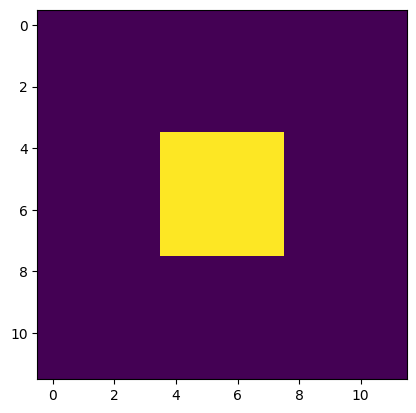

In [38]:
import matplotlib.pyplot as plt

n = 12
epsilon = 2e-1
A = A_efficiently(n, epsilon)

b = np.zeros((n, n))
b[n//2 - n//6:n//2 + n//6,n//2 - n//6:n//2 + n//6] = 1
b = b.flatten()
plt.imshow(b.reshape((n, n)))

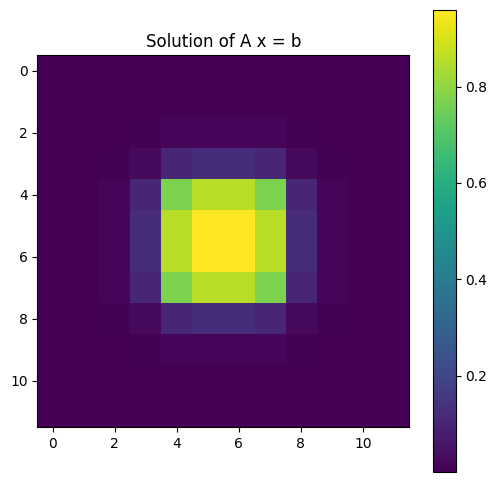

In [21]:
import scipy as sp
import scipy.sparse.linalg as spla

x = spla.spsolve(A, b)

plt.figure(figsize=(6, 6))
plt.imshow(x.reshape((n, n)))
plt.title('Řešení Ax = b')
plt.colorbar()
plt.show()

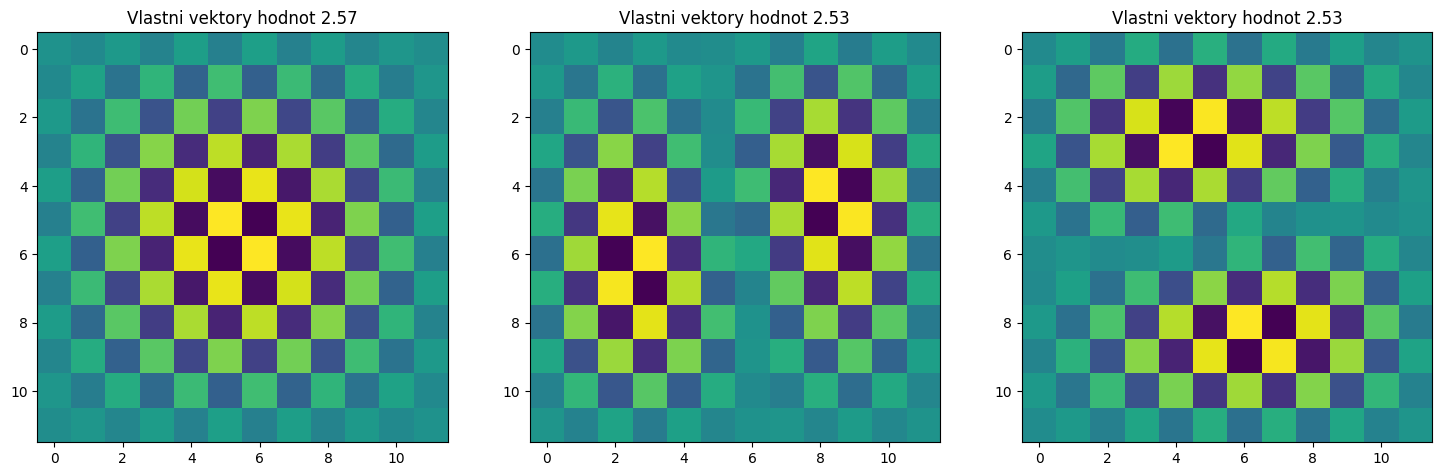

In [37]:
vlastni_hodnoty, vlastni_vektory = spla.eigs(A, k=3)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
for i in range(3):
    axs[i].imshow(np.real(vlastni_vektory[:, i]).reshape((n, n)))
    axs[i].set_title('Vlastni vektory hodnot {:.2f}'.format(np.real(vlastni_hodnoty[i])))
plt.show()

5. Nalezněte všechny kořeny Legendrova polynomu stupně 5 na intervalu $<-1,1>$

In [32]:
koreny = sp.special.l_roots(5)
print(koreny)

(array([ 0.26356032,  1.41340306,  3.59642577,  7.08581001, 12.64080084]), array([5.21755611e-01, 3.98666811e-01, 7.59424497e-02, 3.61175868e-03,
       2.33699724e-05]))


6. Pomocí SymPy nalezněte všechny kořeny Legendrova polynomu stupně 5. Použíjte `sympy.legendre()` pro vytvoření výrazu odpovídajícímu Legendrovu polynomu.
- porovnejte výsledky s předchozím úkolem

In [34]:
import sympy as sp

x = sp.Symbol('x')
legendre_5 = sp.legendre(5, x)
legendre_5


63*x**5/8 - 35*x**3/4 + 15*x/8